# Лабораторная работа №4
# Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей

### Цель лабораторной работы
Изучение сложных способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей.

### Задание
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
3. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
4. Постройте модель и оцените качество модели с использованием кросс-валидации.
5. Произведите подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.

# Загрузка данных

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

wine = load_wine()
for x in wine:
    print(x)

data
target
target_names
DESCR
feature_names


In [2]:
data = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

In [3]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


# Разделение выборки на обучающую и тестовую

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=1)

In [5]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((133, 13), (45, 13), (133,), (45,))

# Обучение модели ближайших соседей для произвольно заданного гиперпараметра K

In [7]:
# 3 ближайших соседа
# Метрика accuracy вычисляет процент (долю в диапазоне от 0 до 1) правильно определенных классов
cl1_1 = KNeighborsClassifier(n_neighbors=3)
cl1_1.fit(X_train, Y_train)
target1_0 = cl1_1.predict(X_train)
target1_1 = cl1_1.predict(X_test)
accuracy_score(Y_train, target1_0), accuracy_score(Y_test, target1_1)

(0.8646616541353384, 0.6888888888888889)

In [8]:
# 7 ближайших соседей
# Метрика accuracy вычисляет процент (долю в диапазоне от 0 до 1) правильно определенных классов
cl1_2 = KNeighborsClassifier(n_neighbors=7)
cl1_2.fit(X_train, Y_train)
target2_0 = cl1_2.predict(X_train)
target2_1 = cl1_2.predict(X_test)
accuracy_score(Y_train, target2_0), accuracy_score(Y_test, target2_1)

(0.7669172932330827, 0.6444444444444445)

# Построение модели с использованием кросс-валидации

In [11]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), wine.data, wine.target, cv=3)

# Значение метрики accuracy для 3 фолдов
scores

array([0.61666667, 0.57627119, 0.79661017])

In [12]:
# Усредненное значение метрики accuracy для 3 фолдов
np.mean(scores)

0.6631826741996233

In [14]:
# использование метрики precision
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), 
                         wine.data, wine.target, cv=3,
                        scoring='precision_weighted')
scores, np.mean(scores)

(array([0.61631579, 0.59473992, 0.78926159]), 0.6667724311739814)

In [15]:
# функция cross_validate позволяет использовать для оценки несколько метрик
scoring = {'precision': 'precision_weighted', 
           'jaccard': 'jaccard_weighted',
           'f1': 'f1_weighted'}

scores = cross_validate(KNeighborsClassifier(n_neighbors=3), 
                        wine.data, wine.target, scoring=scoring, 
                        cv=3, return_train_score=True)
scores

{'fit_time': array([0.00096178, 0.0010004 , 0.00060678]),
 'score_time': array([0.01024246, 0.00891662, 0.0099349 ]),
 'test_precision': array([0.61631579, 0.59473992, 0.78926159]),
 'train_precision': array([0.84432192, 0.87868395, 0.78719633]),
 'test_jaccard': array([0.44786325, 0.41520347, 0.66077488]),
 'train_jaccard': array([0.72223627, 0.78003999, 0.65344998]),
 'test_f1': array([0.60380952, 0.57731661, 0.78515946]),
 'train_f1': array([0.83420614, 0.87517928, 0.78484177])}

# Подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации

In [16]:
n_range = np.array(range(3,57,3))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51,
         54])}]

In [17]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(X_train, Y_train)

Wall time: 558 ms


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51,
       54])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [18]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00218086, 0.00212307, 0.00158558, 0.00108957, 0.00184259,
        0.00125513, 0.00199342, 0.00102086, 0.0020196 , 0.00073862,
        0.00071645, 0.00144172, 0.00056171, 0.00139828, 0.0016283 ,
        0.00114975, 0.00193057, 0.00018373]),
 'std_fit_time': array([0.00163108, 0.00157372, 0.00159792, 0.0007865 , 0.00134667,
        0.00108638, 0.00165488, 0.0006186 , 0.00206726, 0.00063647,
        0.00062244, 0.00140927, 0.00078375, 0.0015582 , 0.00165562,
        0.00026166, 0.00133028, 0.00036745]),
 'mean_score_time': array([0.00213423, 0.00315628, 0.00441046, 0.00437102, 0.00364246,
        0.00368738, 0.00446339, 0.00409231, 0.00308895, 0.00358415,
        0.00383306, 0.00358219, 0.00483804, 0.00428672, 0.00429449,
        0.00396485, 0.0032783 , 0.00666952]),
 'std_score_time': array([0.00176675, 0.0022032 , 0.00125795, 0.00042462, 0.00125788,
        0.00141373, 0.00184503, 0.00122823, 0.00111337, 0.00077244,
        0.00169251, 0.00079049, 0.00241147, 

In [19]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                     weights='uniform')

In [20]:
# Лучшее значение метрики
clf_gs.best_score_

0.7435897435897435

In [21]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 45}

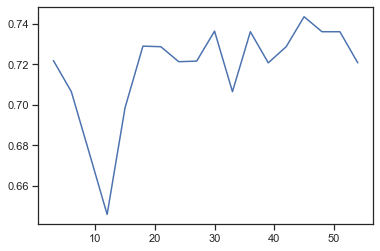

In [22]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

Таким образом, оптимальный гиперпараметр K = 45.